In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from os.path import join
import pickle
from sklearn.model_selection import KFold, cross_val_score, ShuffleSplit


In [3]:
model = pickle.load(open('model.pickl', 'rb'))
model

/Users/robert_arbon/anaconda/envs/ml4dyn/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/robert_arbon/anaconda/envs/ml4dyn/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/robert_arbon/anaconda/envs/ml4dyn/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pa

Pipeline(steps=[('cluster', NDGrid(max=1.2, min=-1.2, n_bins_per_feature=200)), ('msm', MaximumLikelihoodMSM(connectivity='largest', count_mode='sliding',
           dt_traj='1 step', lag=25, maxerr=1e-08, maxiter=1000000,
           mincount_connectivity='1/n', reversible=True, score_k=10,
           score_method='VAMP2', sparse=False, statdist_constraint=None))])

In [4]:
paths = ['data/000.5pc/quad_well_{:02d}.npy'.format(x) for x in range(100)]
# paths
X = [np.load(x) for x in paths]

In [5]:
model.set_params(cluster__n_bins_per_feature=200)
model.set_params(msm__score_k=4)

Pipeline(steps=[('cluster', NDGrid(max=1.2, min=-1.2, n_bins_per_feature=200)), ('msm', MaximumLikelihoodMSM(connectivity='largest', count_mode='sliding',
           dt_traj='1 step', lag=25, maxerr=1e-08, maxiter=1000000,
           mincount_connectivity='1/n', reversible=True, score_k=4,
           score_method='VAMP2', sparse=False, statdist_constraint=None))])

In [6]:
data = {'score_method':[], 'cv_method': [], 'n_splits': [], 'MCV': [], 'MCV_err': []}
score_methods = ['vamp1', 'vamp2', 'vampe']
cv_methods = {'KFold': KFold(), 'ShuffleSplit': ShuffleSplit(test_size=.5, random_state=42)}
n_splits = np.arange(5,21)

In [7]:

for score_method in score_methods:
    model.set_params(msm__score_method=score_method)
    model.set_params(msm__score_k=4)    
    for k, v in cv_methods.items():
        for n in n_splits:
            print(score_method, k, n, end=', ')
            
            v.n_splits=n
            scores = cross_val_score(model, X, cv=v)
            data['score_method'].append(score_method)
            data['cv_method'].append(k)
            data['n_splits'].append(n)
            data['MCV'].append(np.mean(scores))
            data['MCV_err'].append(np.std(scores))



vamp1 KFold 5, vamp1 KFold 6, vamp1 KFold 7, vamp1 KFold 8, vamp1 KFold 9, vamp1 KFold 10, vamp1 KFold 11, vamp1 KFold 12, vamp1 KFold 13, vamp1 KFold 14, vamp1 KFold 15, vamp1 KFold 16, vamp1 KFold 17, vamp1 KFold 18, vamp1 KFold 19, vamp1 KFold 20, vamp1 ShuffleSplit 5, vamp1 ShuffleSplit 6, vamp1 ShuffleSplit 7, vamp1 ShuffleSplit 8, vamp1 ShuffleSplit 9, vamp1 ShuffleSplit 10, vamp1 ShuffleSplit 11, vamp1 ShuffleSplit 12, vamp1 ShuffleSplit 13, vamp1 ShuffleSplit 14, vamp1 ShuffleSplit 15, vamp1 ShuffleSplit 16, vamp1 ShuffleSplit 17, vamp1 ShuffleSplit 18, vamp1 ShuffleSplit 19, vamp1 ShuffleSplit 20, vamp2 KFold 5, vamp2 KFold 6, vamp2 KFold 7, vamp2 KFold 8, vamp2 KFold 9, vamp2 KFold 10, vamp2 KFold 11, vamp2 KFold 12, vamp2 KFold 13, vamp2 KFold 14, vamp2 KFold 15, vamp2 KFold 16, vamp2 KFold 17, vamp2 KFold 18, vamp2 KFold 19, vamp2 KFold 20, vamp2 ShuffleSplit 5, vamp2 ShuffleSplit 6, vamp2 ShuffleSplit 7, vamp2 ShuffleSplit 8, vamp2 ShuffleSplit 9, vamp2 ShuffleSplit 10, va

In [8]:
df = pd.DataFrame(data)
df.head()

,MCV,MCV_err,cv_method,n_splits,score_method
0,3.438385,0.053466,KFold,5,vamp1
1,3.437630,0.050577,KFold,6,vamp1
2,3.405880,0.086966,KFold,7,vamp1
3,3.413761,0.104927,KFold,8,vamp1
4,3.414530,0.095119,KFold,9,vamp1


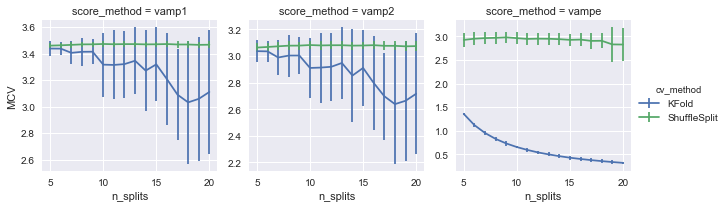

In [13]:
g = sns.FacetGrid(data=df, col='score_method', hue='cv_method', sharey=False)
g.map(plt.errorbar, 'n_splits', 'MCV', 'MCV_err').add_legend()